# Breast Cancer Classification with Neural Networks

## 1. Import dependencies

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split


# 2. Data collection and processing

In [2]:
# Loading the data from sklearn
dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(dataset) # in the form of dictionary

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['label']=dataset.target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [67]:
df.sample(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
28,15.3,25.27,102.4,732.4,0.1082,0.1697,0.1683,0.08751,0.1926,0.0654,...,36.71,149.3,1269.0,0.1641,0.611,0.6335,0.2024,0.4027,0.09876,0


In [7]:
df.shape

(569, 31)

In [8]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

0 --> benign

1 --> malingant

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [11]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


0 --> malignant (not good) --> means are generally higher, makes sense

# 3. Separate features and target

In [13]:
X = df.drop(columns='label', axis=1)
y = df['label']

In [14]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

# 4. Split data into train and test data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [18]:
print(y.shape, y_train.shape, y_test.shape)

(569,) (455,) (114,)


In [19]:
# Standardise the data
from sklearn.preprocessing import StandardScaler

In [20]:
print(X_train)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
560        14.05         27.15           91.38      600.4          0.09929   
428        11.13         16.62           70.47      381.1          0.08151   
198        19.18         22.49          127.50     1148.0          0.08523   
203        13.81         23.75           91.56      597.8          0.13230   
41         10.95         21.35           71.90      371.1          0.12270   
..           ...           ...             ...        ...              ...   
299        10.51         23.09           66.85      334.2          0.10150   
534        10.96         17.62           70.79      365.6          0.09687   
493        12.46         12.83           78.83      477.3          0.07372   
527        12.34         12.27           78.94      468.5          0.09003   
168        17.47         24.68          116.10      984.6          0.10490   

     mean compactness  mean concavity  mean concave points  mea

In [21]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
print(X_train)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


# 5. Building the neural network

In [23]:
# Importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3) # will always get the same accuracy score, to get reproducible results
from tensorflow import keras


In [24]:
# Setting up the layers of the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(), # input layer, convert data into single dimension array
    keras.layers.Dense(20, activation='relu'), # hidden layer, 20 neurons
    keras.layers.Dense(2, activation='sigmoid') # output layer, 2 neurons, since 2 classes
])


In [25]:
# Compiling the Neural Network
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
# Training the Neural Network
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7780 - loss: 0.5577 - val_accuracy: 0.9348 - val_loss: 0.3980
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8890 - loss: 0.3908 - val_accuracy: 0.9348 - val_loss: 0.2890
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9347 - loss: 0.2926 - val_accuracy: 0.9783 - val_loss: 0.2266
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9382 - loss: 0.2344 - val_accuracy: 0.9783 - val_loss: 0.1896
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9445 - loss: 0.1977 - val_accuracy: 0.9783 - val_loss: 0.1659
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9433 - loss: 0.1727 - val_accuracy: 0.9783 - val_loss: 0.1492
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9484 - loss: 0.1543 - val_accuracy: 0.9783 - val_loss: 0.1367
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9577 - loss: 0.1399 - val_accuracy: 0.9783 - val_loss

# 6. Visualising the results

[0.8019559979438782, 0.90220046043396, 0.9388753175735474, 0.9462102651596069, 0.9535452127456665, 0.9535452127456665, 0.955990195274353, 0.9633252024650574, 0.9682151675224304, 0.9682151675224304]
[0.9347826242446899, 0.9347826242446899, 0.97826087474823, 0.97826087474823, 0.97826087474823, 0.97826087474823, 0.97826087474823, 0.97826087474823, 0.97826087474823, 0.97826087474823]


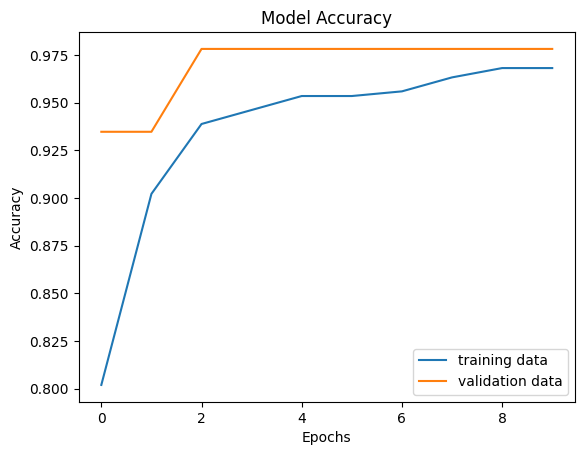

In [36]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

[0.5246038436889648, 0.3753688931465149, 0.286638081073761, 0.23318570852279663, 0.19854283332824707, 0.1743435114622116, 0.15615157783031464, 0.1418219804763794, 0.1302773803472519, 0.12063242495059967]
[0.3980470597743988, 0.2890002131462097, 0.22657941281795502, 0.1896084100008011, 0.16590596735477448, 0.14923802018165588, 0.13669849932193756, 0.12683747708797455, 0.11882659792900085, 0.11213276535272598]


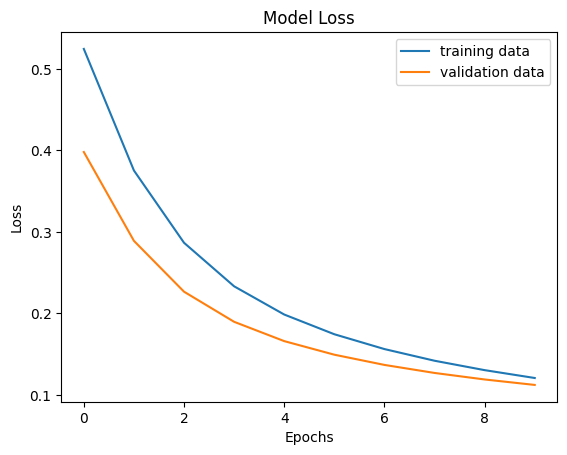

In [38]:
print(history.history['loss'])
print(history.history['val_loss'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

# 7. Model Testing

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy, loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9763 - loss: 0.1143 
0.9824561476707458 0.11039365828037262


# 8. Build Predictive Sytem

In [43]:
print(X_test.shape)
print(X_test[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [55]:
Y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [59]:
print(Y_pred.shape)
print(Y_pred) # 2 results as we have 2 output neurons

(114, 2)
[[3.8860914e-01 7.3931360e-01]
 [4.7189647e-01 5.9907222e-01]
 [2.6306248e-01 9.8614633e-01]
 [9.9487954e-01 3.1230989e-04]
 [4.7920260e-01 5.2953053e-01]
 [9.5508462e-01 1.1606074e-02]
 [3.8557991e-01 7.9773980e-01]
 [4.7351032e-01 9.9308336e-01]
 [3.6368620e-01 9.3646634e-01]
 [5.0342852e-01 9.6937752e-01]
 [5.0139517e-01 6.1707211e-01]
 [2.6369831e-01 8.4145337e-01]
 [4.0716910e-01 8.6302394e-01]
 [3.1432927e-01 7.9751086e-01]
 [3.9751723e-01 9.5535648e-01]
 [8.6819941e-01 2.4238758e-01]
 [3.7714180e-01 9.7290504e-01]
 [2.2933041e-01 9.6788692e-01]
 [5.5582869e-01 9.6939683e-01]
 [9.3682110e-01 5.7639327e-02]
 [5.7489169e-01 9.9448448e-01]
 [3.8733700e-01 9.8528659e-01]
 [4.0606391e-01 9.8697001e-01]
 [3.0044964e-01 9.8386973e-01]
 [4.9649531e-01 8.5266602e-01]
 [8.1648445e-01 9.5139354e-02]
 [3.7413445e-01 9.3489295e-01]
 [3.6914948e-01 8.1471044e-01]
 [8.0530500e-01 2.7848437e-01]
 [8.1015444e-01 7.4706785e-02]
 [4.5999950e-01 9.5049381e-01]
 [2.8166425e-01 8.9740497e-01]

model.predict() gives the prediction probability of each class for that data point

In [57]:
# argmax function

my_list = [10, 20, 30]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[10, 20, 30]
2


In [71]:
# Converting the prediction probability to class labels

Y_pred_labels = [int(np.argmax(i)) for i in Y_pred]
print(Y_pred_labels)


[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [73]:
# Convert first 30 columns to a NumPy array (excluding the last column)
X_model_testing = df.iloc[:, :-1].values  

input_data = (X_model_testing[0])

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardising the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [int(np.argmax(prediction))]
print(prediction_label)

if (prediction_label[0] == 0):
    print("The tumour is Malignant.")
else:
    print("The tumour is Benign.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.98283684 0.01876235]]
[0]
The tumour is Malignant.


c:\Users\joeln\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 9. Save model and scaler

In [75]:
# First, save your trained model and scaler (run this code in your notebook)
import joblib

# Save the model
model.save('breast_cancer_model.keras')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']